# Mini Project
### GRA 4160 - Predictive Modelling with Machine Learning

Group 3: Zhou Yurou, Qianru Tao, Shan Xu, Nhung Dinh

## **1. Introduction**
### **1.1. Research Topic**
#### **Movie Recommendation System**
- **Why**: While using browsing apps, we observed that recommendations are influenced by repeated interactions—such as likes, comments, or frequent views. This sparked our curiosity to explore the underlying mechanisms behind these recommendation systems.
- **What**: Based on the datasets we found, we decided to build a simple Web Movie Recommendation System that enhances user experience by integrating two key approaches:
    - **Collaborative Filtering (CF)** – Captures user behavior and preferences.
    - **Content-Based Filtering (CBF)** – Recommends movies based on attributes and genres.

### **1.2. Research Objectives**
#### **Leveraging multiple data sources for a hybrid recommendation system**
**a) Research Problem & Gap**

Most recommendation systems rely on either **Collaborative Filtering (CF)** or **Content-Based Filtering (CBF)**, but both approaches have inherent weaknesses:
- **CF**: Captures user preferences based on ratings but struggles with the cold start problem (new users/movies has no rate) and data sparsity.  
- **CBF**: Lacks personalization based on user behavior and relies heavily on movie attributes.  
- **Dataset merging challenges**: From different sources is challenging due to mismatched movie titles, causing data loss and reducing dataset size.  

**b) Research Goal**

This research **leverages two different data sources**—one optimized for **CF** (user behavior and ratings) and another for **CBF** (movie attributes)—to build a **hybrid recommendation system without directly merging datasets**. 

Instead, we design a model that **combines the strengths** of CF and CBF while mitigating their individual weaknesses.

**c) Key Objectives**

- Develop a Collaborative Filtering model (IBCF & UBCF) using a dataset rich in user ratings and behavioral patterns.
- Implement a Content-Based Filtering model that captures movie attributes (genres, directors, cast, etc.) for better recommendations.
- Combine CF & CBF in a Hybrid Model that can:
    - Improve recommendation accuracy by leveraging both **user behavior and movie attributes**.
    - **Address cold start issues** by using CBF for new users and CF for users with rating history.
    - **Ensure flexibility** by integrating both approaches without requiring dataset merging, preserving data integrity.

## **2. Data description**
### **2.1. Data sources**
a) For Collaborative Filtering Approach: `ratings.csv` + `movies.csv`
   - **Source**: GroupLens Research (MovieLens) [https://grouplens.org/datasets/movielens/latest/](https://grouplens.org/datasets/movielens/latest/) (small dataset)  
   - **Data Info**:  
     - 100,836 movie ratings and 3,683 tag applications across 9,742 movies. Created by 610 users between March 29, 1996, and September 24, 2018.  
     - Features: `userID`, `movieId`, `title`, `ratings`, `genres`

b) For Content-Based Filtering Aprroach: `tmdb_5000_movies.csv` + `tmdb_5000_credits.csv`  
   - **Source**: Kaggle TMDB Box Office Prediction [https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)  
   - **Data Info**: `movieId`, `title`, `keywords`, `overview`, `cast`, `crew`, `budget`, `box office`, `language`, `duration`, `average ratings`, `popularity`, etc.  (no user-specific information)

### **2.2. Reasons for using multiple datasets**
- **Minimizing data loss**: The two datasets originate from different sources and have limited overlap in movie titles. Mapping them together reduces the dataset to only 2,600 movies, leading to substantial data loss and restricting recommendation diversity
- **Addressing data sparsity**: Since not all users rate every movie they watch, the dataset inherently has many missing ratings. This sparsity makes it challenging for Collaborative Filtering (CF) to generate reliable recommendations, as CF relies on shared user-item interactions.
- **Handling cold start problems** by leveraging the strengths of different approaches:
  - Collaborative Filtering (CF): Captures user behavior and preferences based on rating patterns, struggles with new users or movies (cold start)
  - Content-Based Filtering (CBF): Utilizes movie attributes and genres to make recommendations independent of user interactions.
- Flexibility in designing and combining separate CF and CBF models into a hybrid system.

**_Alternative data source_**: Use an Ensembled Dataset created by merging data collected from TMDB and GroupLens, download from:
https://www.kaggle.com/code/rounakbanik/movie-recommender-systems/input 

## **3. Research Methods**
### **3.1. Content-Based Filtering (CBF)** 
- **Definition**: Content-Based Filtering (CBF) is a recommendation technique that suggests items based on their attributes and a user’s past interactions. It assumes that if a user likes an item, they will likely prefer other items with similar characteristics  
- **Dataset**: `tmdb_5000_movies.csv` + `tmdb_5000_credits.csv`.  
- **Strengths**: 
  - **Handles cold start problems**: Unlike Collaborative Filtering, CBF can generate recommendations for new users based on their preferences in genres, actors, or other attributes.
  - **Personalized recommendations**: Since CBF focuses on individual user preferences rather than overall community trends, it provides highly personalized recommendations.
  - **Independence from user interactions**: CBF relies solely on content attributes (genre, cast etc)
- **Algorithms**:
  - TF-IDF and Cosine Similarity for text-based attributes
  - k-Nearest Neighbors for finding similar items 
    
### **3.2. Collaborative Filtering (IBCF + UBCF)**
#### **3.2.1. Item-based Collaborative Filtering (IBCF)**
- **Definition**: Item-Based Collaborative Filtering (IBCF) is a recommendation technique that suggests items based on their similarity to items the user has already interacted with. Instead of analyzing user-to-user interactions, IBCF focuses on item-to-item relationships, assuming that users will prefer items similar to those they have rated or consumed before
- **Dataset**: `ratings.csv` + `movies.csv`
- **Strengths**: 
  - Scalability advantage: The item-item similarity matrix is smaller and more stable than a user-user similarity matrix, making it more efficient for large datasets
  - Cold start for users: IBCF does not require many user interactions—it can still recommend items as long as there is enough item similarity data.
- **Algorithms**: 
  - Singular Value Decomposition (SVD): a matrix factorization technique, decomposes a user-item interaction matrix into lower-dimensional matrices, capturing latent factors that explain user preferences and item characteristics.
  - K-Nearest Neighbors (KNN): Identifies the most similar items for recommendation

#### **3.2.2. User-Based Collaborative Filtering (UBCF)**
- **Definition**: User-Based Collaborative Filtering (UBCF) is a recommendation technique that suggests items to a user based on the preferences of other users with similar behavior. It assumes that users who have shown similar interests in the past will have similar preferences in the future
- **Dataset**: `ratings.csv` + `movies.csv`
- **Strengths**: 
  - Since UBCF is based on user interactions, it can adapt to changing user tastes better than static content-based methods.
  - By considering different users’ preferences, UBCF can suggest a broader range of items compared to item-based methods, which may only recommend closely related items
- **Algorithms**: 
  - Singular Value Decomposition (SVD): a matrix factorization technique, decomposes a user-item interaction matrix into lower-dimensional matrices, capturing latent factors that explain user preferences and item characteristics.
  - K-Nearest Neighbors (KNN): Identifies the most similar items for recommendation

### **3.3. Hybrid / Ensemble recommender**
- **Why Hybrid**: Combines strengths of CF and CBF to improve recommendation quality.  
- **How**:  
  - **Implementation**: 
    - KNN_Movie + KNN_User
    - KNN_User + SVD
    - KNN_User + CBF (Keywords)

### **3.4. Evaluation**
- Content-based filtering: Measure recommendation quality using metrics like RMSE or MAE
- 


## **4. Implementation & results**

### **4.1. Content-Based Filtering (CBF)**
- **Performance**:  
- **Strengths**: Effective for cold start problems.  
- **Limitations**: Lacks personalization.  

### **4.2. Collaborative Filtering (IBCF + UBCF)** 
- **Performance**:  
- **Strengths**: Captures user preferences.  
- **Limitations**: Struggles with sparse data.  

### **4.3. Singular Value Decomposition (SVD)**  
- **Performance**:  
- **Strengths**: Handles sparse data and captures latent factors.  
- **Limitations**: Requires tuning and may lose interpretability.  

### **4.4. Hybrid / Ensemble recommender** 
- **Performance**: Compare hybrid results to standalone CF and CBF.  
- **Improvements**: Highlight enhanced recommendation quality.  

## **5. Discussions**

### **5.1. Comparison of CF and CBF**
- Highlight scenarios where CF or CBF is more effective.  

### **5.2. Challenges of separate datasets** 
- Discuss challenges (e.g., incompatible movie IDs) and their impact on results.  

### **5.3. Insights from the Hybrid model**  
- Discuss whether the hybrid model improved recommendation quality.  
- Highlight trade-offs (e.g., complexity vs. performance).  



## **6. Conclusion**  

### **6.1. Summary of findings**
- Summarize key findings (e.g., hybrid models outperform standalone CF and CBF).  

### **6.2. Implications** 
- Discuss implications for real-world recommendation systems.  

### **6.3. Limitations**
- Acknowledge limitations (e.g., small dataset overlap).  

### **6.4. Future work**
- Suggest future research directions (e.g., using external APIs for dataset matching).  



## **7. Reference**
1) https://surprise.readthedocs.io/en/stable/getting_started.html 
2) https://grouplens.org/datasets/movielens/latest/ (small)
3) https://dev.to/mondal_sabbha/understanding-mae-mse-and-rmse-key-metrics-in-machine-learning-4la2
4) https://statisticsbyjim.com/regression/root-mean-square-error-rmse/
5) https://medium.com/@m.waqar.ahmed/understanding-mean-absolute-error-mae-in-regression-a-practical-guide-26e80ebb97df

In [11]:
# import necessary libraries
import pandas as pd
import numpy as np
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from surprise import SVD, Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from surprise import accuracy
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## **Content-Based Filtering (CBF)**

In [ ]:
# Data preparation and cleaning
## load data
credits_data = pd.read_csv('5000credits.csv').rename(columns={'movie_id': 'id'})
movies_data = pd.read_csv('5000movies.csv')

## check NaN values at each columns
credits_data.info()
movies_data.info()

def get_names(row):
    try:
        data = json.loads(row)
        names = [text['name'] for text in data]
        return ','.join(names)
    except (json.JSONDecodeError, TypeError):
        return None

## extract information from columns    
credits_data['cast'] = credits_data['cast'].apply(get_names)
credits_data['crew'] = credits_data['crew'].apply(get_names)
movies_data['genres'] = movies_data['genres'].apply(get_names)
movies_data['keywords'] = movies_data['keywords'].apply(get_names)
movies_data['production_companies'] = movies_data['production_companies'].apply(get_names)
movies_data['production_countries'] = movies_data['production_countries'].apply(get_names)
movies_data['spoken_languages'] = movies_data['spoken_languages'].apply(get_names)

## drop some columns with missing values or duplicate columns
movies_data = movies_data.drop(['original_title', 'release_date', 'runtime', 'homepage'], axis = 1)

## drop 'title' to avoid duplicate in merged dataframe
credits_data = credits_data.drop('title', axis = 1)

## merge data
tmdb = pd.merge(credits_data, movies_data, on = 'id', how = 'outer')

# Content-based Recommendation 
## step 1: select features to combine
tmdb['combined_features'] = (
    tmdb['genres'].fillna('') + ' ' + 
    tmdb['keywords'].fillna('') + ' ' + 
    tmdb['cast'].fillna('') + ' ' +
    tmdb['crew'].fillna('') + ' ' +
    tmdb['overview'].fillna(''))

## step 2: Calculate the TF-IDF matrix
### stop_words='english' in TfidfVectorizer removes common English words 
### ("the", "is", "and", "a" ...) from the text before processing
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(tmdb['combined_features'])

## step 3: Calculate the similarity of cosine
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

## step 4: recommendation based on the movie title
def recommendation(title, num_movies):    
    # get the target movie index
    self_idx = tmdb[tmdb['title'] == title].index[0]    
    # get the similarity score with this movie
    # create a list of tuple : 0 is movie idx and 1 is cosine similarity
    sim_score = list(enumerate(cos_sim[self_idx]))
    # sort scores and get the highest scores
    sim_score = sorted(sim_score, key = lambda x: x[1], reverse = True)[1:(num_movies + 1)]
        # recommendate similar movies
    suggest_idx = [score[0] for score in sim_score]
    suggest_score = [score[1] for score in sim_score]
    recommend_movies = tmdb.iloc[suggest_idx]['title']
    return pd.DataFrame({'Title': recommend_movies, 'Similarity Score': suggest_score})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4803 non-null   int64 
 1   title   4803 non-null   object
 2   cast    4803 non-null   object
 3   crew    4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popu

In [4]:
recommendation(title = 'Avatar', num_movies = 10)

,Title,Similarity Score
4108,Jurassic World,0.153745
3481,John Carter,0.129230
256,Titanic,0.127560
3546,Star Trek Into Darkness,0.124876
3464,The Dark Knight Rises,0.123927
39,Armageddon,0.122795
4062,Dawn of the Planet of the Apes,0.122625
4057,Guardians of the Galaxy,0.120563
2861,The Avengers,0.117954
4071,The Hobbit: The Battle of the Five Armies,0.117521


#### **Shortcomings of CBF leading to CF**
- **Limited Personalization**: CBF ignores user interactions, relying only on item attributes (e.g., genres, keywords).
- **Over-Specialization**: CBF tends to recommend items too similar to what the user has already interacted with, reducing diversity in recommendations.  
- **Cold Start for New Items**: CBF struggles to recommend new items with limited or no attribute data.  
- **No User Interaction Insights**: CBF does not leverage user-item interactions, missing valuable patterns in user preferences.  

$\rightarrow$ These limitations lead to **Collaborative Filtering** to incorporate user interactions and improve recommendations.  
  
We first consider **Item-Based Collaborative Filtering (IBCF)**, it recommends movies based on **how similarly they were rated across all users**.

**_Example_**: If many users rate Movie A and Movie B similarly, then when a user likes Movie A, Movie B can be recommended.

---

## **Collaborative Filtering**

In [5]:
# Step 1: Load and merge the datasets
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

## Merge datasets
df1 = ratings.merge(movies, on = "movieId", how = "left")
display(df1)

## Define rating scale range
rating_min, rating_max = df1['rating'].min(), df1['rating'].max()
print(f"Rating scale: {rating_min} to {rating_max}")

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


Rating scale: 0.5 to 5.0


Each `userId` rated more than 1 movie, with ratings ranging from 0.5 to 5.0

Let's get comprehensive rating statistics per user.

,counts,average_rating,highest_rating,lowest_rating
userId,,,,
414,2698,3.39,5.0,0.5
599,2478,2.64,5.0,0.5
474,2108,3.40,5.0,0.5
448,1864,2.85,5.0,0.5
274,1346,3.24,5.0,0.5
610,1302,3.69,5.0,0.5
68,1260,3.23,5.0,0.5
380,1218,3.67,5.0,0.5
606,1115,3.66,5.0,0.5


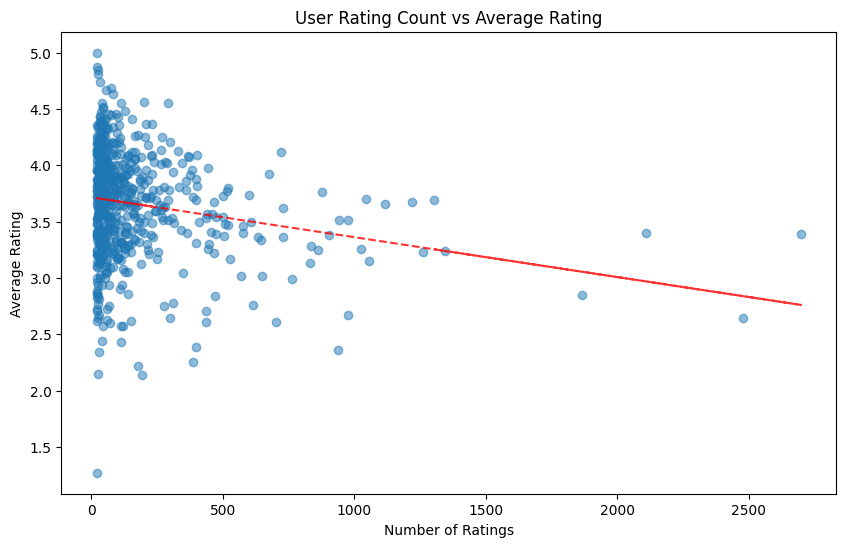

In [6]:
# Get comprehensive rating statistics per user
user_rating_stats = df1.groupby('userId')['rating'].agg(['count', 'mean', 'max', 'min']).round(2)
user_rating_stats.columns = ['counts', 'average_rating', 'highest_rating', 'lowest_rating'] 

# Display top 10 most active users (rated most)
display(user_rating_stats.sort_values('counts', ascending=False).head(10))

# Scatter plot with trend line
plt.figure(figsize=(10, 6))
plt.scatter(user_rating_stats['counts'], user_rating_stats['average_rating'], alpha=0.5)
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.title('User Rating Count vs Average Rating')

# Add trend line
z = np.polyfit(user_rating_stats['counts'], user_rating_stats['average_rating'], 1)
plt.plot(user_rating_stats['counts'], np.poly1d(z)(user_rating_stats['counts']), "r--", alpha=0.8)
plt.show()

Scatter plot description:
- Each point represents a user
- X-axis: Number of movies rated by the user
- Y-axis: Average rating given by the user
- Red dashed line: Trend line showing the overall pattern

**Rating Distribution**
- Most users give average ratings between 2.5 and 4.5
- The majority of users rate fewer than 500 movies
- There's a slight negative trend (red line slopes downward)

**User Behavior Pattern**
- Users who rate fewer movies show more variation in their average ratings (more spread vertically on the left)
- Very active users (>1000 ratings) tend to have more moderate average ratings (closer to 3.0-3.5)

In [7]:
# Step 2: Create User-Movie Ratings Matrix for Collaborative Filtering (CF)
user_movie_matrix = df1.pivot_table(index="userId", columns="title", values="rating").fillna(0)
print(f"Number of Users and Number of Movies: {len(user_movie_matrix.index), len(user_movie_matrix.columns)}")
user_movie_matrix 

Number of Users and Number of Movies: (610, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0


From the user-movie ratings matrix, we can:
- For Item-based Collaborative Filtering: 
    - Finds similar movies by analyzing how users rate them (columns in the matrix)
    - Recommends movies that are rated similarly by multiple users
- For User-based Collaborative Filtering: 
    - Finds similar users by comparing their rating patterns (rows in the matrix)
    - Recommends movies that similar users have rated highly but the target user hasn't seen.
---

### **Item-based Collaborative Filtering (IBCF)**

#### **Step 1: Finding similar movies**
- Construct an user-movie ratings matrix, with values are ratings of users for movies
- IBCF identifies similar movies using Cosine Similarity with KNN (K-Nearest Neighbors) function.

##### **1) Constructing the User-Movie Ratings Matrix**
- The User-Movie Matrix is pivoted so that movies become rows and users become columns.
- Missing ratings are filled with 0, assuming unrated movies are not interacted with.
    
##### **2) Computing Movie Similarity using Cosine Similarity**
Cosine Similarity is used to measure how similar two movies are based on user ratings.
- Each movie's ratings from users are represented as a vector.
- Cosine similarity measures how close these vectors are, i.e., how similar the rating patterns are.

**_Why Cosine Similarity?_** 
- Works well with **sparse data** (since users don’t rate every movie).  
- Not affected by **rating scale differences** (e.g., some users rate generously, others strictly).  
- Measures similarity in **rating patterns, not rating values**.  

**Cosine Similarity Formula**  
$$
\cos(\theta) = \frac{A \cdot B}{\|A\| \times \|B\|}
$$

_Where_:
- **A and B** are the rating vectors of two movies.
- **Dot product (A ⋅ B)** measures the sum of pairwise rating multiplications.
- **Magnitude (||A|| × ||B||)** normalizes values to keep the range between -1 and 1.  
    - A cosine similarity of **1** means the movies have identical rating behaviors.
    - A cosine similarity of **0** means the movies are completely different.
    
##### **3) Using KNN to Identify the Most Similar Users**
- `KNN (NearestNeighbors)` finds movies with the **highest cosine similarity scores** 
- The `kneighbors()` function  is used to find similar movies and retrieve the top most 'N' similar movies
- The function kneighbors() is used to find similar movies

_**Example Output**_: The coding results below show that a search for "Toy Story (1995)", the system finds similar movies based on rating behavior.

#### **Step 2: Generating Movie Recommendations**
Once similar movies are found, IBCF recommends movies that are highly similar to the ones the user has already rated highly.
- **Extract Movie Details**: Find genres and average ratings of similar movies.
- **Sort by Highest Avg Rating**: Movies with the highest average ratings are prioritized.

In [ ]:
# Step 1: Construct the User-Movie Rating Matrix
user_movie_matrix = df1.pivot_table(index = "userId", columns = "title", values = "rating").fillna(0)

# Step 2: Fit the KNN Model to Identify Similar Movies
knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors = 10, n_jobs = -2).fit(user_movie_matrix.T)

# Step 3: Define Function to Retrieve Similar Movies
def get_similar_movies(movie_title, top_n=10):
    """
    Finds the top N most similar movies based on rating patterns across users.
    """
    if movie_title not in user_movie_matrix.columns:
        return pd.DataFrame()  # Return an empty DataFrame if movie not found
    
    # Find the Index of the Given Movie in the Matrix
    movie_idx = list(user_movie_matrix.columns).index(movie_title)
    
    # Step 4: Compute Nearest Neighbors (Most Similar Movies)
    distances, indices = knn.kneighbors(user_movie_matrix.T.iloc[movie_idx].values.reshape(1, -1), 
                                        n_neighbors=min(top_n + 1, len(user_movie_matrix.columns) - 1))
    
    # Step 5: Retrieve Original Movie Details
    original_movie_info = movies[movies['title'] == movie_title]
    movie_genre = original_movie_info['genres'].values[0] if not original_movie_info.empty else "Unknown"
    movie_avg_rating = df1[df1['title'] == movie_title]['rating'].mean()

    # Store Results of Similar Movies
    similar_movies = []
    
    for i in indices.flatten()[1:]:  # Exclude the first one (itself)
        similar_movie = user_movie_matrix.columns[i]
        
        # Fetch genre and rating
        genre = movies[movies['title'] == similar_movie]['genres'].values[0] if not movies[movies['title'] == similar_movie].empty else "Unknown"
        avg_rating = df1[df1['title'] == similar_movie]['rating'].mean()
        
        similar_movies.append((similar_movie, genre, avg_rating))

    # Step 6: Sort by Avg Rating in Descending Order
    similar_movies_df = pd.DataFrame(similar_movies, columns=['Movie Title', 'Genre', 'Avg Rating']).sort_values(by='Avg Rating', ascending=False)

    # Display Original Movie Details
    print(f"\nOriginal Movie: {movie_title}")
    print(f"Genre: {movie_genre}")
    print(f"Avg Rating: {movie_avg_rating:.2f}\n")

    # Display the Similar Movies as a DataFrame
    display(similar_movies_df)   
    return similar_movies_df


# Example Usage - Get Similar Movies for "Toy Story (1995)"
example_movie = "Toy Story (1995)"
similar_movies_df = get_similar_movies(example_movie, top_n=10)


Original Movie: Toy Story (1995)
Genre: Adventure|Animation|Children|Comedy|Fantasy
Avg Rating: 3.92



,Movie Title,Genre,Avg Rating
3,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076
4,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134
6,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,4.137755
9,Back to the Future (1985),Adventure|Comedy|Sci-Fi,4.038012
8,Groundhog Day (1993),Comedy|Fantasy|Romance,3.944056
5,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,3.941860
0,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,3.860825
1,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.750000
7,Mission: Impossible (1996),Action|Adventure|Mystery|Thriller,3.537037
2,Independence Day (a.k.a. ID4) (1996),Action|Adventure|Sci-Fi|Thriller,3.445545


The random chosen movie "Toy Story (1995)" got an average rating 3.92, the recommendated are the top 10 movies that have similar average ranking with "Toy Story (1995)". IBCF is great for finding similar movies, but not personalized.

####  **Shortcomings of IBCF**
- **Same Recommendations for Every User**: Toy Story (1995) will always recommend the same movies for every user, ignoring individual preferences.
- **Cold Start Problem for New Movies**: IBCF relies on historical ratings, new movies with few ratings may not get recommended.
- **Data Sparsity**: Many movies have very few ratings, making it difficult to compute meaningful similarities.
- **Limited Diversity**: IBCF recommends similar movies, which may limit recommendations to one genre.

#### **Exploring UBCF to resolve these shortcomings**
- Previous recommendation algorithms (CBF + IBCF) primarily relied on movie similarities, resulting in identical recommendations for all users, lacking personalization. 
- User-based Collaborative Filtering (UBCF) is designed to solve this by capturing diverse tastes that may not be evident from movie similarities alone. 
---

### **User-based Collaborative Filtering (IBCF)**

#### **Step 1: Finding similar users**
- Construct an user-movie ratings matrix, with values are ratings of users for movies
- UBCF identifies similar users using Cosine Similarity with KNN (K-Nearest Neighbors) function.

##### **1) Compute Cosine Similarity for All Users**
Cosine Similarity is used to measure how similar two users or two items (movies) are based on their ratings for each movie. 
- Each user's **rating pattern** (their ratings across different movies) is represented as a **vector**.  
- Cosine similarity measures how close these vectors are to the target user's vector (i.e., how similar their rating behaviors are).

##### **2) Using KNN to Identify the Most Similar Users**
- `KNN (NearestNeighbors)` finds movies with the **highest cosine similarity scores**.  
- The `kneighbors()` function  is used to find similar movies and retrieve the **top closest users**.

_**Example Output**_: The coding results below show that **Users 266, 313, 368, 57, and 91** are the most similar to User 1.

#### **Step 2: Generating Movie Recommendations**
Once similar users are found, UBCF recommends movies based on:  
- Movies that similar users have highly rated, aggregating average rating for each movie.
- Movies that User 1 (the target user) has not rated before.


🔹 Step 1: User 1's Ratings Vector (Ratings across different movies) (First 10 Movies)


,movieId,title,genres,rating
0,5060,M*A*S*H (a.k.a. MASH) (1970),Comedy|Drama|War,5.0
1,2872,Excalibur (1981),Adventure|Fantasy,5.0
2,1291,Indiana Jones and the Last Crusade (1989),Action|Adventure,5.0
3,1298,Pink Floyd: The Wall (1982),Drama|Musical,5.0
4,2948,From Russia with Love (1963),Action|Adventure|Thriller,5.0
5,2947,Goldfinger (1964),Action|Adventure|Thriller,5.0
6,2944,"Dirty Dozen, The (1967)",Action|Drama|War,5.0
7,2899,Gulliver's Travels (1939),Adventure|Animation|Children,5.0
8,2858,American Beauty (1999),Drama|Romance,5.0
9,2700,"South Park: Bigger, Longer and Uncut (1999)",Animation|Comedy|Musical,5.0



🔹 Step 2: Finding Similar Users to the Target User 1


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,User ID,Cosine Similarity Score
0,266,0.357408
1,313,0.351562
2,368,0.345127
3,57,0.345034
4,91,0.334727



🔹 Step 3: User-Based CF - Recommended Movies:


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,title,movieId,rating,genres
0,"Commitments, The (1991)",3060,5.0,Comedy|Drama|Musical
1,Phantasm II (1988),3837,5.0,Action|Fantasy|Horror|Sci-Fi|Thriller
2,"Name of the Rose, The (Name der Rose, Der) (1986)",2467,5.0,Crime|Drama|Mystery|Thriller
3,Flash Gordon (1980),4941,5.0,Action|Adventure|Sci-Fi
4,UHF (1989),4678,5.0,Comedy
5,"Big Sleep, The (1946)",1284,5.0,Crime|Film-Noir|Mystery
6,Clash of the Titans (1981),5540,5.0,Action|Adventure|Fantasy|Romance
7,"Maltese Falcon, The (1941)",913,5.0,Film-Noir|Mystery
8,Key Largo (1948),3334,5.0,Crime|Drama|Film-Noir|Thriller
9,The Golden Voyage of Sinbad (1973),3771,5.0,Action|Adventure|Fantasy


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


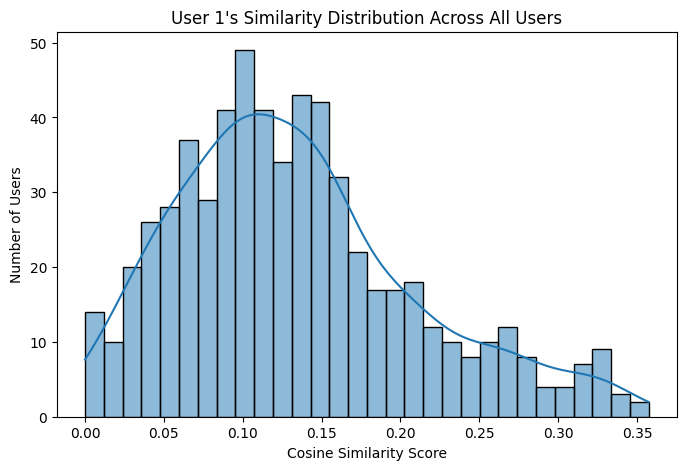

In [9]:
# Step 1: Compute User-User Similarity Using KNN
knn_user = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10).fit(user_movie_matrix)

# Step 2: Show the ratings given by a specific user
def get_user_rating_vector(user_id):
    user_ratings = df1[df1['userId'] == user_id][['movieId','title', 'genres', 'rating']].sort_values(by='rating', ascending=False).reset_index(drop=True)
    return user_ratings.head(10)  # Show first 10 ratings

# Step 3: Find similar users based on cosine similarity and display similarity scores
def get_similar_users(user_id, top_n=5):
    if user_id not in user_movie_matrix.index:
        print(f"User {user_id} not found in dataset!")
        return pd.DataFrame(columns=["User ID", "Cosine Similarity Score"])
    
    user_idx = user_movie_matrix.index.get_loc(user_id)  # Get user index
    distances, indices = knn_user.kneighbors(
        user_movie_matrix.iloc[user_idx].values.reshape(1, -1), 
        n_neighbors=min(top_n + 1, len(user_movie_matrix))
    )
    
    # Extract similar user IDs (excluding itself)
    similar_users = [user_movie_matrix.index[i] for i in indices.flatten()[1:]]
    
    # Extract similarity scores (cosine similarity = 1 - distance)
    similarity_scores = [1 - distances.flatten()[i] for i in range(1, len(distances.flatten()))]
    
    # Combine into a DataFrame
    similar_users_df = pd.DataFrame({
        "User ID": similar_users,
        "Cosine Similarity Score": similarity_scores
    }).sort_values(by="Cosine Similarity Score", ascending=False)

    return similar_users_df
    # To verify that the users are truly the most similar:#1. Sort and display the top 10 most similar users 
                                                          #2. Plot a histogram of cosine similarity scores across all user

# Step 4: Recommend movies based on similar users
def get_user_based_recommendations(user_id, top_n=10):
    similar_users_df = get_similar_users(user_id, top_n=5)  # Get top 5 similar users
    
    if similar_users_df.empty:
        print("No similar users found.")
        return pd.DataFrame(columns=["movieId", "title", "genres", "rating"])  

    similar_users = similar_users_df["User ID"].tolist()  # Extract user IDs

    # Get movies rated by similar users
    similar_user_ratings = df1[df1["userId"].isin(similar_users)]

    # Ensure we don’t recommend movies User 1 has already seen
    user_rated_movies = set(df1[df1["userId"] == user_id]["title"])
    unseen_movies = similar_user_ratings[~similar_user_ratings["title"].isin(user_rated_movies)]

    if unseen_movies.empty:
        print("No new movies to recommend.")
        return pd.DataFrame(columns=["movieId", "title", "genres", "rating"])

    # Aggregate average rating for each movie  
    recommended_movies = unseen_movies.groupby(["title", "movieId"]).agg(
        {"rating": "mean", "genres": "first"}).reset_index()

    # Sort by highest average rating
    recommended_movies = recommended_movies.sort_values(by="rating", ascending=False)

    # Reset index  
    recommended_movies.reset_index(drop=True, inplace=True)
    return recommended_movies.head(top_n)

# Step 5: Verify that the users are truly the most similar
def plot_similarity_histogram(user_id):
    """Plot a histogram of similarity scores across all users"""
    all_distances, all_indices = knn_user.kneighbors(
        user_movie_matrix.iloc[user_movie_matrix.index.get_loc(user_id)].values.reshape(1, -1),
        n_neighbors=len(user_movie_matrix)
    )
    
    all_similarity_scores = [1 - all_distances.flatten()[i] for i in range(1, len(all_distances.flatten()))]
    
    plt.figure(figsize=(8, 5))
    sns.histplot(all_similarity_scores, bins=30, kde=True)
    plt.xlabel("Cosine Similarity Score")
    plt.ylabel("Number of Users")
    plt.title(f"User {user_id}'s Similarity Distribution Across All Users")
    plt.show()


# Example Usage (Random option)
example_user = 1

## Step 1: Show the Target User's Rating Vector
print(f"\n🔹 Step 1: User {example_user}'s Ratings Vector (Ratings across different movies) (First 10 Movies)")
user1_rating_vector = get_user_rating_vector(example_user)
display(user1_rating_vector)

## Step 2: Compute & Display Similar Users
print(f"\n🔹 Step 2: Finding Similar Users to the Target User {example_user}")

similar_users_df = get_similar_users(example_user, top_n=5)
display(similar_users_df)

## Step 3: Recommend Movies
print("\n🔹 Step 3: User-Based CF - Recommended Movies:")
user_based_recommendations = get_user_based_recommendations(example_user, top_n=10)
display(user_based_recommendations)

## Step 4: Visualize the Target User's Similarity Distribution
plot_similarity_histogram(example_user)

- The **first 10 movies rated by User 1** are displayed, showing how they rate movies (e.g., rating style, preferences).
- The system finds **the most similar users** to User 1 using **K-Nearest Neighbors (KNN) with Cosine Similarity**. To verify that the users are truly the most similar, we first sort and display the top 10 most similar users, then plotting a histogram of cosine similarity scores across all users. However, the similarity scores (~0.35) seem low, which can happen due to:
    - **Sparse ratings**: Many users may have rated only a few common movies.
    - **Different rating styles**: Even similar users might rate on different scales.
    - **Dimensionality issue**: If users have rated different sets of movies, their similarity might not be strong.
- **A list of 10 recommended movies** are based on the preferences of the most similar users, sorted by **average rating** among similar users.
    - However, the recommendations are mainly highly-rated movies but may not always match User 1’s preferences precisely.

#### **Shortcomings of UBCF**
- **Cold Start Problem**
    - **Issue:** UBCF struggles when **new users** or **new movies** enter the system since there isn’t enough data to find similar users.
    - **Solution:** Matrix Factorization techniques, such as **SVD (Singular Value Decomposition)**, can help by making predictions even with sparse data.

- **Scalability**
    - **Issue:** Calculating pairwise similarities between users can become **computationally expensive** for large datasets.
    - **Solution:** **SVD reduces dimensionality**, making similarity computations more efficient.

- **Data Sparsity**
    - **Issue:** The user-movie matrix is often **highly sparse**, meaning that many users have **not rated** most movies.
    - **Solution:** A **Hybrid Recommender System** (combining UBCF with Content-Based Filtering or SVD) can **improve recommendation accuracy**.

$\rightarrow$ These shortcomings further leads to SVD, which addresses scalability and cold start problems to overcome limitations in personalization and scalability.

---

## **Singular Value Decomposition (SVD)**
- Singular Value Decomposition (SVD) is a Matrix Factorization technique used in collaborative filtering to make personalized recommendations. 
-  Unlike UBCF/IBCF, SVD works even when there is data sparsity. It decomposes the large, sparse user-movie rating matrix into lower-dimensional representations of users and movies, capturing their latent features and hidden patterns. 
- It learns latent factors in user preferences (e.g., genre preference, actor preference) to predict missing ratings.

_**Example**_:  If User A hasn’t rated Titanic, SVD predicts their rating based on similar users and past preferences.

Citation: https://surprise.readthedocs.io/en/stable/getting_started.html 

In [10]:
# Load dataset
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()

# Hyperparameter tuning for SVD
param_grid = {
    'n_factors': [20, 50, 100], 
    'n_epochs': [10, 20, 30], 
    'lr_all': np.logspace(-4, -2, 5), 
    'reg_all': np.logspace(-3, -1, 5)
}

# Import RandomizedSearchCV and use correct dataset splitting
rs = RandomizedSearchCV(SVD, param_grid, n_iter=10, measures=['rmse', 'mae'], cv=3, n_jobs=-1)
rs.fit(data)

# Select the best model
best_svd = rs.best_estimator['rmse']
best_svd.fit(trainset)

# Cross-validation for evaluation
cv_results = cross_validate(best_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print("Cross-validation results:", cv_results)

# Function to predict missing ratings for a specific user
def predict_missing_ratings(user_id, num=10):
    
    # Identify Movies the User Has Already Rated
    user_movies = df1[df1['userId'] == user_id]['movieId'].unique()
    
    # Identify Movies the User Has Not Rated
    movie_ids = df1['movieId'].unique()
    unseen_movies = [m for m in movie_ids if m not in user_movies]
    
    # Generate Predictions for Unseen Movies 
    predictions = [best_svd.predict(user_id, mid) for mid in unseen_movies]
    predictions.sort(key=lambda x: x.est, reverse=True)
    
    # Retrieve Movie Titles for the Top N Recommendations
    detailed_predictions = [(pred.iid, movies[movies['movieId'] == pred.iid]['title'].values[0], pred.est) 
                            for pred in predictions[:num]]
    return detailed_predictions


# Example: Get predicted ratings for User 1
example_user = 1
print(f"\nSVD - Predicted Ratings for User {example_user}:")
for movie_id, title, rating in predict_missing_ratings(example_user, 10):
    print(f"Movie: {title} (ID: {movie_id}), Predicted Rating: {rating:.2f}")


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8935  0.8845  0.8792  0.8823  0.8931  0.8865  0.0058  
MAE (testset)     0.6884  0.6836  0.6799  0.6815  0.6891  0.6845  0.0037  
Fit time          0.55    0.64    0.64    0.74    0.65    0.64    0.06    
Test time         0.12    0.06    0.14    0.06    0.06    0.09    0.04    
Cross-validation results: {'test_rmse': array([0.89354602, 0.88450528, 0.87920279, 0.8822934 , 0.89314171]), 'test_mae': array([0.68844533, 0.68360973, 0.67989051, 0.68146705, 0.68907752]), 'fit_time': (0.5504076480865479, 0.6428608894348145, 0.6379067897796631, 0.7441158294677734, 0.6494040489196777), 'test_time': (0.1163485050201416, 0.05553030967712402, 0.13995122909545898, 0.0625770092010498, 0.056694746017456055)}

SVD - Predicted Ratings for User 1:
Movie: Shawshank Redemption, The (1994) (ID: 318), Predicted Rating: 5.00
Movie: Eternal Sunshine of the Spotle

#### **Shortcomings/ Challenges**
- **Loss of Interpretability**
    - Issue: Unlike CBF, which explains recommendations based on genres or actors, SVD relies on abstract latent factors.
    - Solution: A Hybrid model integrates KNN-CBF & SVD, offering both interpretability and accuracy.
- **Cold Start for Sparse Users**
    - Issue: Users with few ratings get less personalized recommendations.
    - Solution: Hybrid models blend KNN-UBCF & SVD to enhance personalization.

By combining multiple recommendation techniques (CBF, UBCF, IBCF, and SVD), hybrid models mitigate individual weaknesses and improve accuracy, personalization, and interpretability.

---
## **Hybrid Recommender**

Aboved recommendation algorithms (CBF, IBCF, UBCF, SVD) each focus on a single aspect, they do not provide recommendations tailored to specific movies or users. 

To address this, we combine these algorithms into 3 ensemble recommenders to enhance personalization and mitigate the individual weaknesses

- KNN_Movie + KNN_User
- KNN_User + SVD
- KNN_User + CBF (Keywords)

In [ ]:
def hybrid_knn_movie_user(rating_df, user_id, movie_id, num_movies):
    # Create a user-item matrix
    rating_matrix = rating_df.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)

    # Fit k-NN model (Item-Based CF)
    knn_movie = NearestNeighbors(metric = 'cosine', algorithm='brute', n_neighbors = 10)
    knn_movie.fit(rating_matrix.T)  # Transpose for item-based filtering

    # Fit k-NN model (User-Based CF)
    knn_user = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors = 10)
    knn_user.fit(rating_matrix)

    # Find similar movies (Item-Based CF)
    movie_idx = rating_matrix.columns.get_loc(movie_id)
    _, similar_movies = knn_movie.kneighbors(rating_matrix.T.iloc[movie_idx].values.reshape(1, -1), n_neighbors = num_movies)
    similar_movies = rating_matrix.columns[similar_movies.flatten()].tolist()

    # Find similar users (User-Based CF)
    user_idx = rating_matrix.index.get_loc(user_id)
    _, similar_users = knn_user.kneighbors(rating_matrix.iloc[user_idx].values.reshape(1, -1), n_neighbors=5)
    similar_users = rating_matrix.index[similar_users.flatten()].tolist()

    # Merge recommendations from both models
    recommended_movies = set(similar_movies)
    for sim_user in similar_users:
        top_movies = rating_matrix.loc[sim_user].sort_values(ascending=False).index[:num_movies]
        recommended_movies.update(top_movies)

    return list(recommended_movies)[:num_movies]

In [ ]:
def hybrid_knn_user_svd(rating_df, user_id, num_movies):
    rating_matrix = rating_df.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
    reader = Reader(rating_scale = (0.5, 5))
    data = Dataset.load_from_df(rating_df[['userId', 'movieId', 'rating']], reader)
    trainset, testset = train_test_split(data, test_size=0.2)
    svd = SVD().fit(trainset)

    # Find similar users
    user_idx = rating_matrix.index.get_loc(user_id)
    _, similar_users = knn_user.kneighbors(rating_matrix.iloc[user_idx].values.reshape(1, -1), n_neighbors=5)
    similar_users = rating_matrix.index[similar_users.flatten()].tolist()

    # Use SVD to predict ratings
    predictions = []
    for movie_id in rating_matrix.columns:
        pred = svd.predict(user_id, movie_id).est
        predictions.append((movie_id, pred))

    # Sort by predicted ratings
    predictions.sort(key=lambda x: x[1], reverse=True)
    
    # Return top-N recommended movies
    return [movie[0] for movie in predictions[:num_movies]]

In [ ]:
def hybrid_knn_user_cbf(rating_df, content_data, user_id, n_recommendations):
    rating_matrix = rating_df.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(content_data)

    # Compute cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Find similar users
    user_idx = rating_matrix.index.get_loc(user_id)
    _, similar_users = knn_user.kneighbors(rating_matrix.iloc[user_idx].values.reshape(1, -1), n_neighbors=5)
    similar_users = rating_matrix.index[similar_users.flatten()].tolist()

    # Get movies rated by similar users
    recommended_movies = set()
    for sim_user in similar_users:
        top_movies = rating_matrix.loc[sim_user].sort_values(ascending=False).index[:n_recommendations]
        recommended_movies.update(top_movies)

    # Apply Content-Based Filtering to refine recommendations
    final_recommendations = []
    for movie_id in recommended_movies:
        movie_idx = movies.index[movies['movieId'] == movie_id][0]
        similar_movies = list(cosine_sim[movie_idx].argsort()[-n_recommendations:])
        final_recommendations.extend(similar_movies)

    return list(set(final_recommendations))[:n_recommendations]